### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [370]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


In [371]:
#from google.colab import drive
#drive.mount('/content/drive')

In [372]:
try:
    visits = pd.read_csv('/content/drive/MyDrive/Data/visits_info_short.csv')
    orders = pd.read_csv('/content/drive/MyDrive/Data/orders_info_short.csv')
    costs = pd.read_csv('/content/drive/MyDrive/Data/costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    # Прописан дополнительный путь т.к. проект выполнялся локально

In [373]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

In [374]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [375]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [376]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Первичый просмотр данных показал что в столбцах с датами некорректный тип данных. Необходимо поменять. 
Наименование столбцов содержат пробелы и заглавные буквы. Наименования необходимо скорректировать.

In [377]:
#Переименование столбцов
visits = visits.rename(columns = {'User Id':'user_id', 
                                  'Session Start':'session_start', 
                                  'Session End':'session_end'})
orders = orders.rename(columns={'User Id':'user_id', 
                                'Event Dt':'event_dt'})

In [378]:
# Приведение к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [379]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
 

In [380]:
# Проверка на дубликаты
display(visits.duplicated().sum(),
        orders.duplicated().sum(),
        costs.duplicated().sum())

0

0

0

In [381]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

Наименования столбцов скорректированы (приведены к нижнему регистру и исключены пробелы между словами). Столбцы содержащие даты приведены к соответствующему типу данных. Дубликаты не выявлены.

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [382]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'],
        how='left')

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [383]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [384]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [385]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [386]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [387]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [388]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [389]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [390]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [391]:
display('Минимальная дата привлечения пользователей', profiles['dt'].min(),
        'Максимальная дата привлечения пользователей', profiles['dt'].max())

'Минимальная дата привлечения пользователей'

datetime.date(2019, 5, 1)

'Максимальная дата привлечения пользователей'

datetime.date(2019, 10, 27)

In [392]:
profiles.groupby('region').agg(
    {'user_id': 'nunique',
     'payer': 'mean'}).reset_index().rename(columns={'user_id': 'total_count',
                                                     'payer': 'mean'}).sort_values(by='mean', 
                                                                                   ascending=False)
                                                                  

,region,total_count,mean
3,United States,100002,0.069019
1,Germany,14981,0.041119
2,UK,17575,0.039829
0,France,17450,0.037994


Пользователи приложения приходят из 4-х стран: США, Германия, Англия, Франция. Самая большая доля приходится на США, как по количеству, так и по доле платящих пользователей.

In [393]:
profiles.groupby('device').agg(
    {'user_id': 'nunique',
     'payer': 'mean'}).reset_index().rename(columns={'user_id': 'total_count',
                                                     'payer': 'mean'}).sort_values(by='mean', 
                                                                                   ascending=False)


,device,total_count,mean
1,Mac,30042,0.063644
3,iPhone,54479,0.062079
0,Android,35032,0.058518
2,PC,30455,0.050468


Больше всего пользователей приходится на владельцев iPhone, при этом самая большая доля платящих пользователей у владельцев Mac 

In [394]:
profiles.groupby('channel').agg(
    {'user_id': 'nunique',
     'payer': 'mean'}).reset_index().rename(columns={'user_id': 'total_count',
                                                     'payer': 'mean'}).sort_values(by='mean', 
                                                                                   ascending=False)


,channel,total_count,mean
1,FaceBoom,29144,0.122049
0,AdNonSense,3880,0.113402
9,lambdaMediaAds,2149,0.104700
6,TipTop,19561,0.096007
5,RocketSuperAds,4448,0.079137
7,WahooNetBanner,8553,0.052964
8,YRabbit,4312,0.038265
3,MediaTornado,4364,0.035747
2,LeapBob,8553,0.030633
4,OppleCreativeMedia,8605,0.027077


Больше всего пользователей приходят в приложение самостоятельно, но доля платящих пользователей выше всего у FaceBoom, AdNonSense и lambdaMediaAds - выше 10%.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [395]:
# Общая сумма расходов на маркетинг
costs['costs'].sum()

105497.30000000002

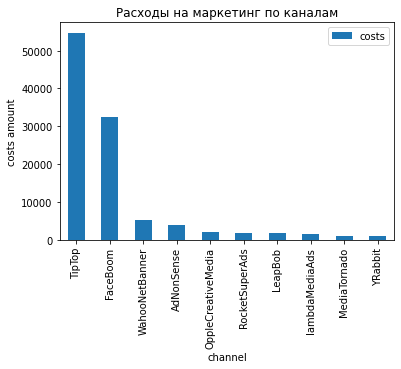

In [396]:
costs['month'] = costs['dt'].astype('datetime64[M]').dt.month

costs.pivot_table(index='channel', 
                  values='costs', 
                  aggfunc='sum').reset_index().sort_values(by='costs',
                                                           ascending=False).plot(kind='bar', 
                                                                                 x='channel', 
                                                                                 y='costs')
                                                                                  
plt.title('Расходы на маркетинг по каналам')
plt.ylabel('costs amount')
plt.show()

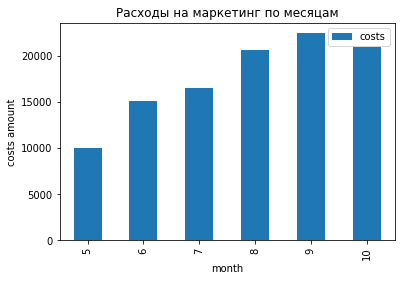

In [397]:

costs.pivot_table(index='month', values='costs', aggfunc='sum').reset_index().plot(kind='bar', 
                                                                                     x='month', 
                                                                                     y='costs') 
plt.title('Расходы на маркетинг по месяцам')
plt.ylabel('costs amount')
plt.show()

<Figure size 1440x360 with 0 Axes>

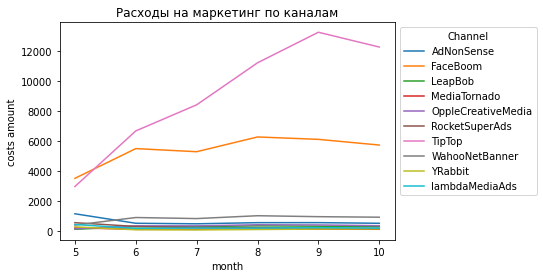

In [398]:
plt.figure(figsize=(20, 5))
costs.pivot_table(index='month',
                  columns='channel',
                  values='costs', 
                  aggfunc='sum').reset_index().plot(kind='line', x='month')
                                                                                 
                                                                                  
plt.title('Расходы на маркетинг по каналам')
plt.legend(title='Channel', loc=2, bbox_to_anchor=(1,1))
plt.ylabel('costs amount')
plt.show()

На диаграмме видно что самые большие расходы на маркетинг приходятся на 2 канала: TipTop и FaceBoom. Общие расходы на маркетинг за пол года увеличились в 2 раза. Динамика расходов показывает, что по всем каналам расходы распределены равномерно в районе 1000 за каждый месяц. Выделяются только TipTop и FaceBoom. Расходы FaceBoom за пол года немного повысились с 4000 до 5500-6000. Расходы TipTop повышались ежемесячно примерно на 2000. Итого за 6 месяцев вырсли с 3000 до 12000.

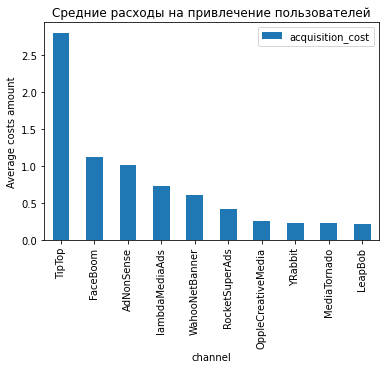

In [399]:
profiles.query(
    'channel != "organic"').pivot_table(index='channel', 
                                        values='acquisition_cost', 
                                        aggfunc='mean').reset_index().sort_values(by='acquisition_cost',
                                                                                 ascending=False).plot(kind='bar', 
                                                                                                       x='channel', 
                                                                                                       y='acquisition_cost')
plt.title('Средние расходы на привлечение пользователей')
plt.ylabel('Average costs amount')
plt.show()

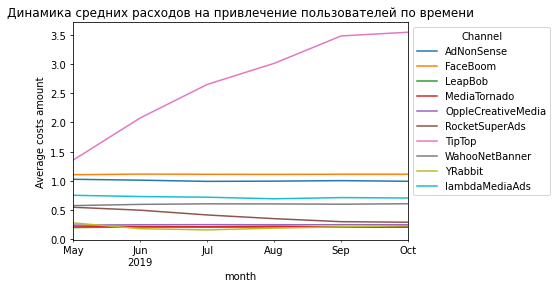

In [400]:
profiles.query(
    'channel != "organic"').pivot_table(index='month',
                                        columns='channel',
                                        values='acquisition_cost', 
                                        aggfunc='mean').reset_index().plot(x='month') 
                                                                                                            
plt.title('Динамика средних расходов на привлечение пользователей по времени')
plt.legend(title='Channel', loc=2, bbox_to_anchor=(1,1))
plt.ylabel('Average costs amount')
plt.show()

На диаграмме мы видим что средние расходы на привлечение пользователей больше всего у канала TipTop - 2,5 руб за 1 пользователя. По остальным каналам привлечения средняя стоимость привлечения не превышает 1 руб. Динамика изменения средних расходов на привлечение 1 пользователя покаывает рост только для канала  TipTop. По остальным каналам показатель стабильный на протяжении всех 6 месяцев.  

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [401]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles = profiles.query('channel != "organic"')

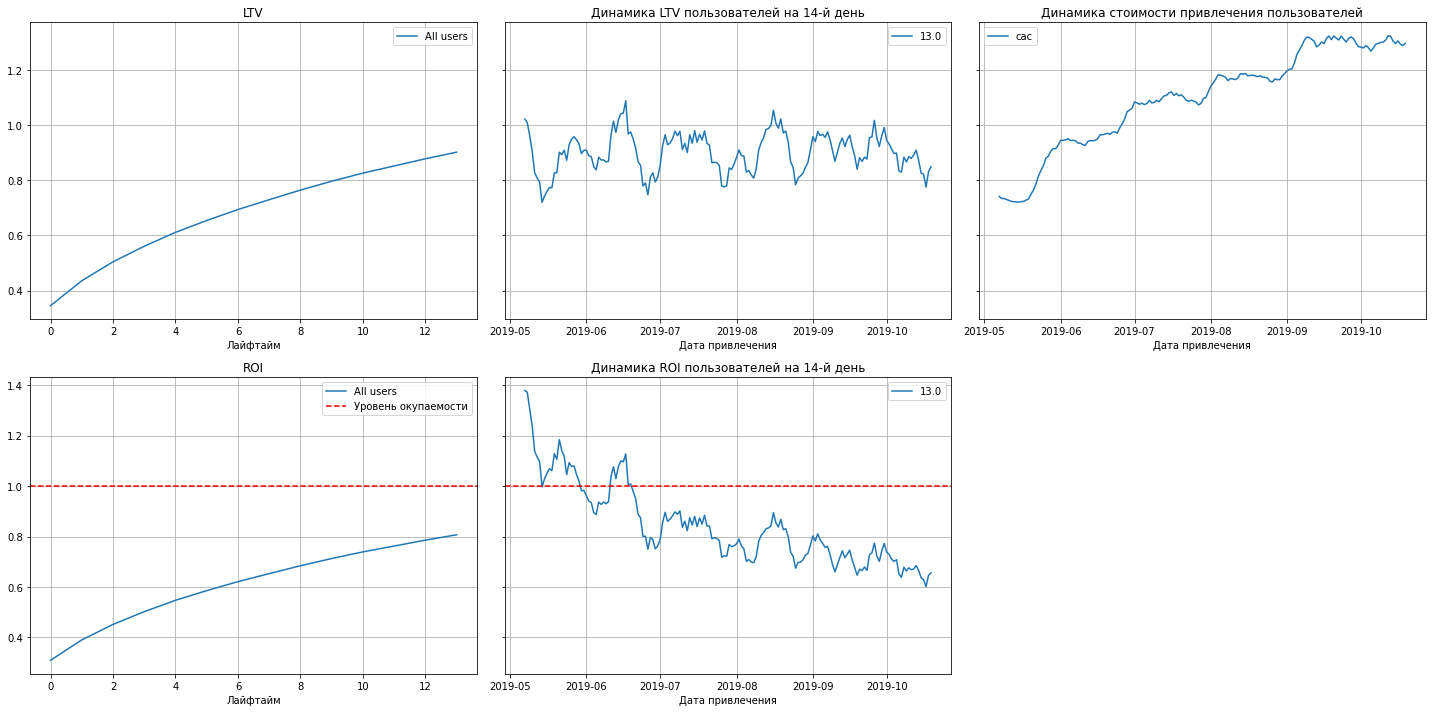

In [402]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

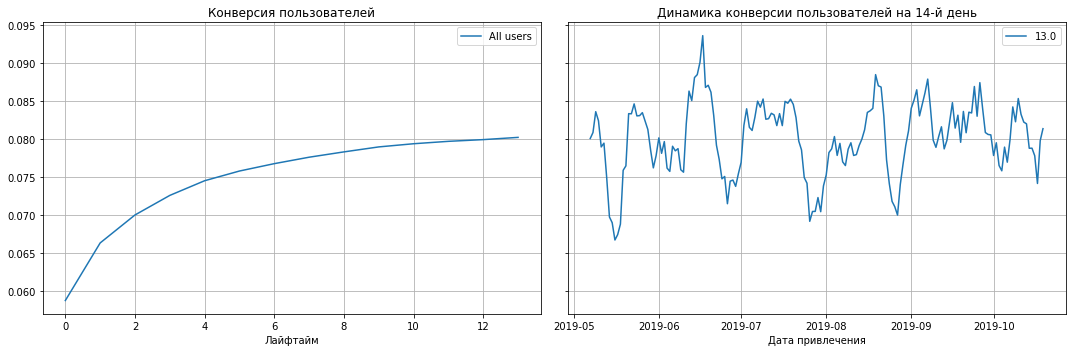

In [403]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

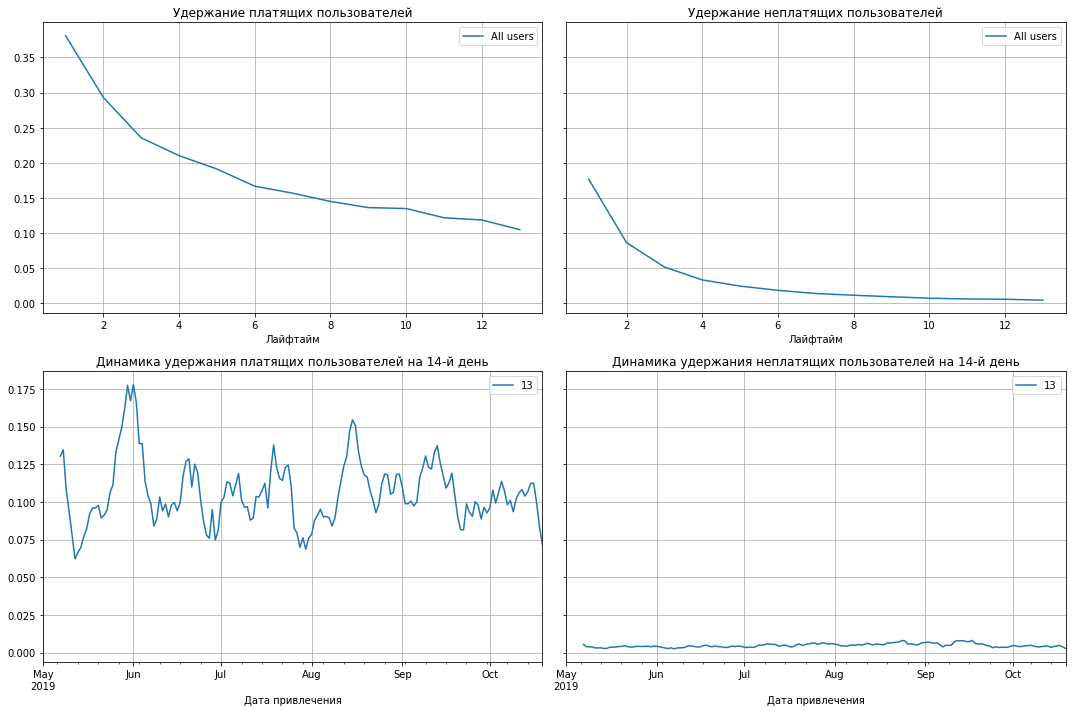

In [404]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

На графике видно что LTV растет в течение 2-х недель после регистрации, динамика LTV за пол годаостается на одном уровне. При этом стоимость привлечения пользователей стабильно растет.
На графике ROI мы видим что затраты на маркетинг не окупаются. Динамика окупаемости инвестиций к 14 дню стабильно падает. 

График конверсии показывает также рост, а удержание пользователей как платящих так и неплатящих падает с 1 по 14 день. Чтобы понять причины посмотрим показатели в разрезе стран, типов устройств и каналов привлечения.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

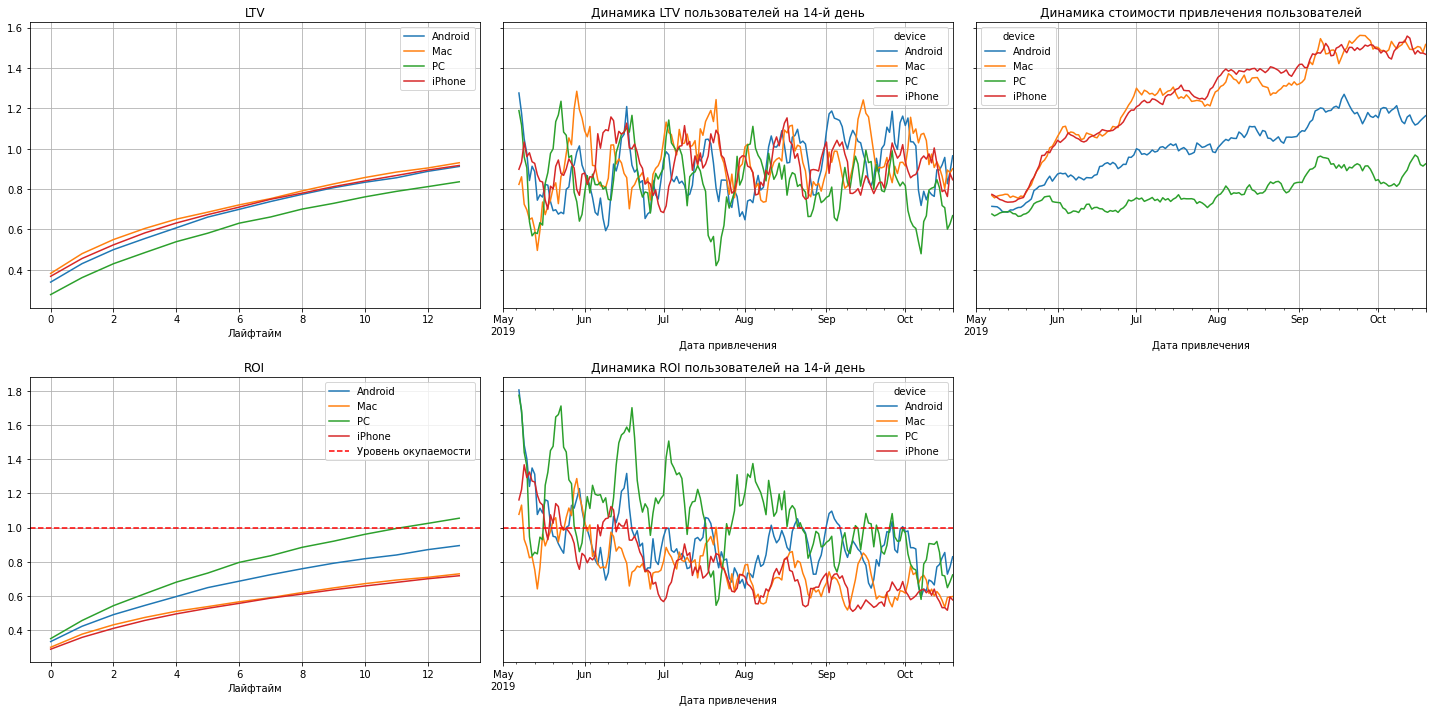

In [405]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Графики окупаемости рекламы в разрезе устройств показывают:
- LTV стабильно растет и не зависит от типа устройства. Только у РС показатель чуть ниже. При этом динамика LTV за 6 месяцев остается на одном уровне.
- динамика стоимости привлечения клиента стабильно растет, при этом самые высокие показатели у владельцев Mac и iPhone. Самая низкая стоимость привлечения у пользователей РС.
- ROI выше 100 % только у пользователей PC на 12 день "жизни" пользователя. При этом динамика  ROI за 6 месяцев снижается для всех устройств. А начная с сентября реклама перестала окупаться для всех устройств. 


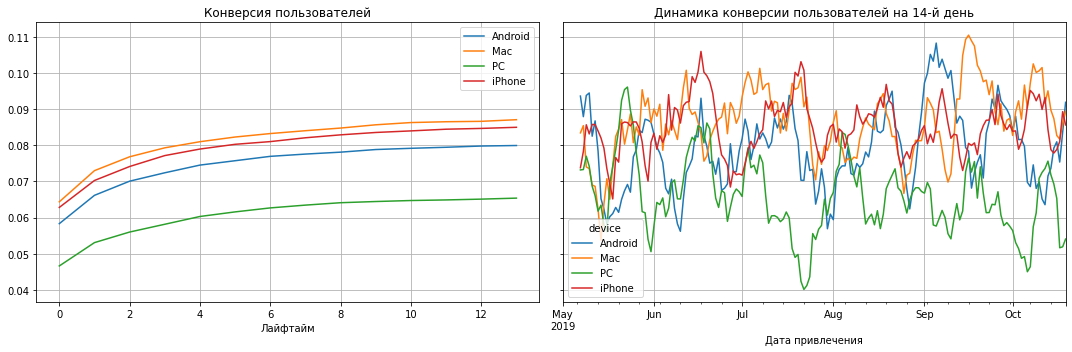

In [406]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

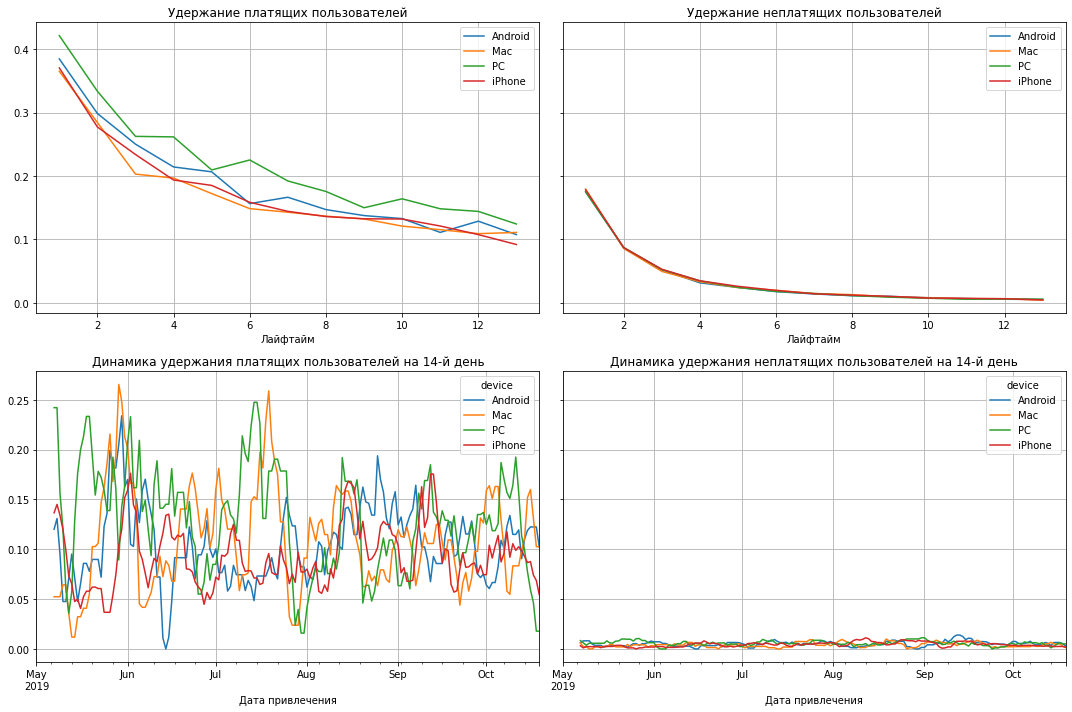

In [407]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

На графике конверсии мы видим что самые высокие показатели у владельцев iPhone и MacBook. Но при этом на графике удержания платящих пользовтелей видно что у владельцев iPhone и Mac показатели хуже чем у владельцев других устройств.

### Проанализируйте окупаемость рекламы с разбивкой по странам

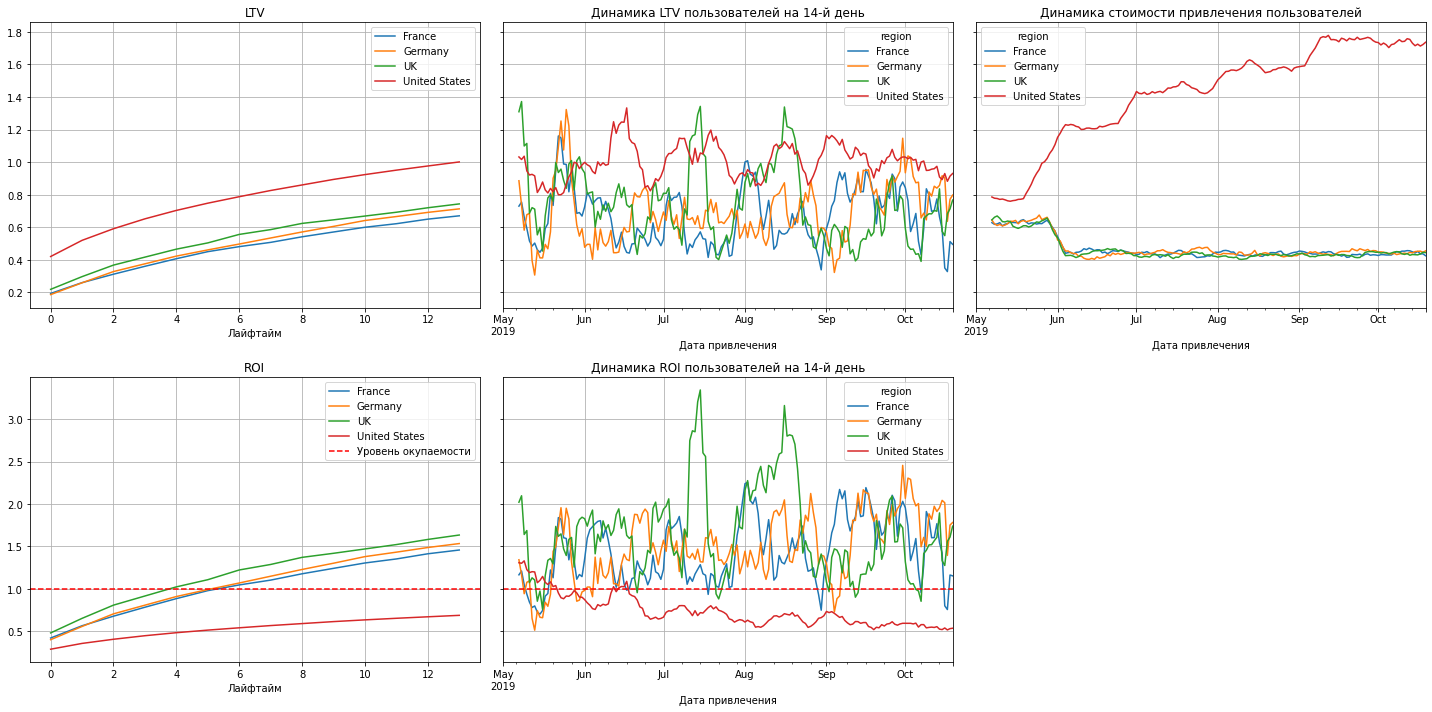

In [408]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Анализ по странам показал:
- расходы на маркетинг окупаются во всех странах на 4 день "жизни" клиента, кроме США. В США расходы не окупились даже на 14-й день.
- стоимость привлечения пользователя у США значительно выше остальных стран, в то время как в других странах стоимость снизилась и держится на уровне 0,4 в течение 5 месяцев
- Динамика ROI в США хуже остальных стран и ниже порога окупаемости.


### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

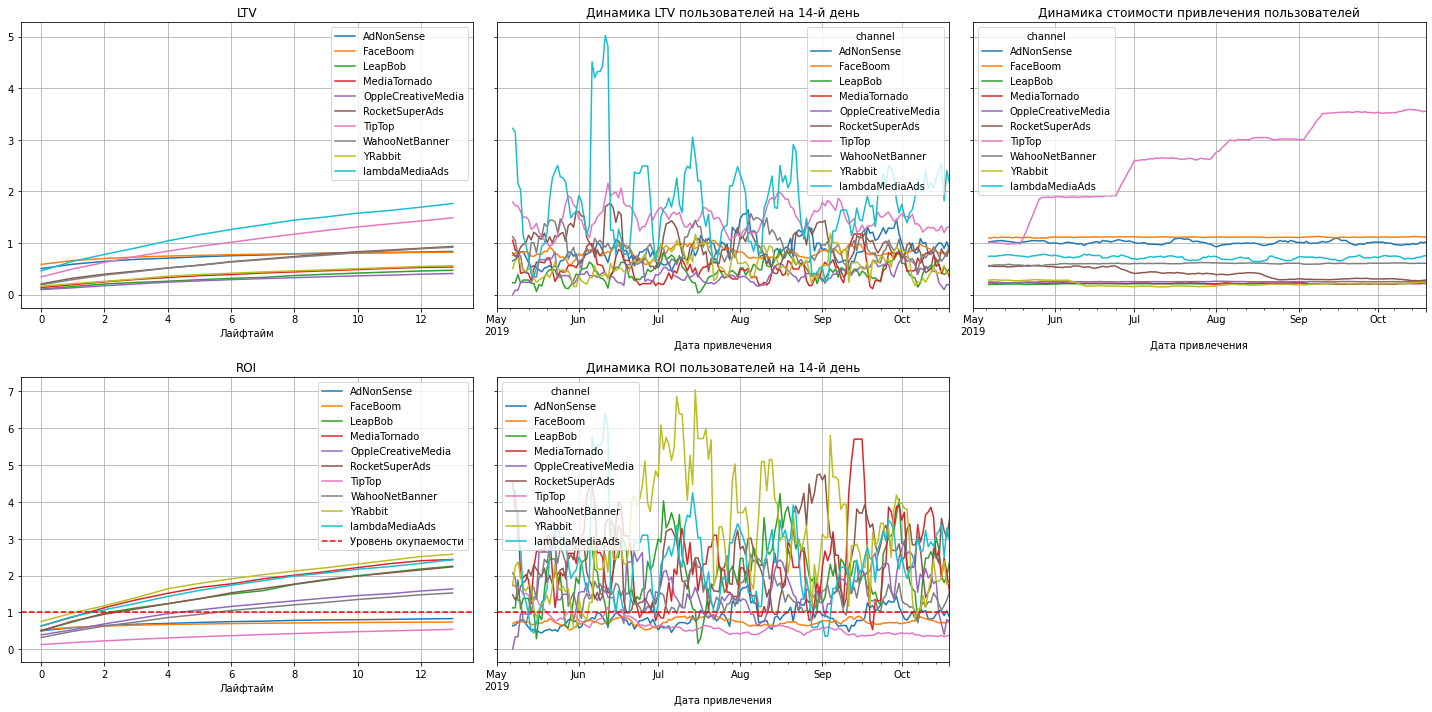

In [409]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Анализ окупемости рекламы по каналам привлечения показал:
- самый высокий LTV у каналов TipTop и lambdaediaAds. Причем показатель lambdaMediaAds выше чем у TipTop при средней стоимости привлечения пользователей.
- уже к 3 дню жизни почти по всем каналам расходы на маркетинг окупаются. Ниже порога окупаемости остаются каналы TipTop, FaceBoom, AdNonSense.
- стоимость привлечения пользователя значительно выше других у компании TipTop. Виден значительный рост стоимости привлечения за последние 6 месяцев.

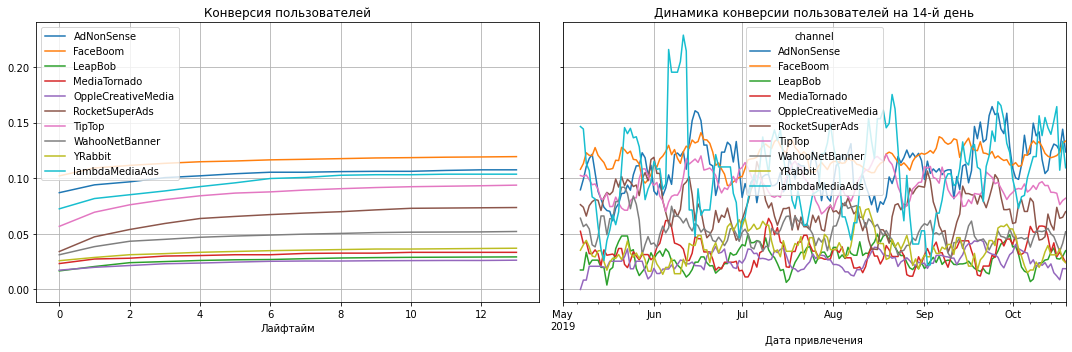

In [410]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

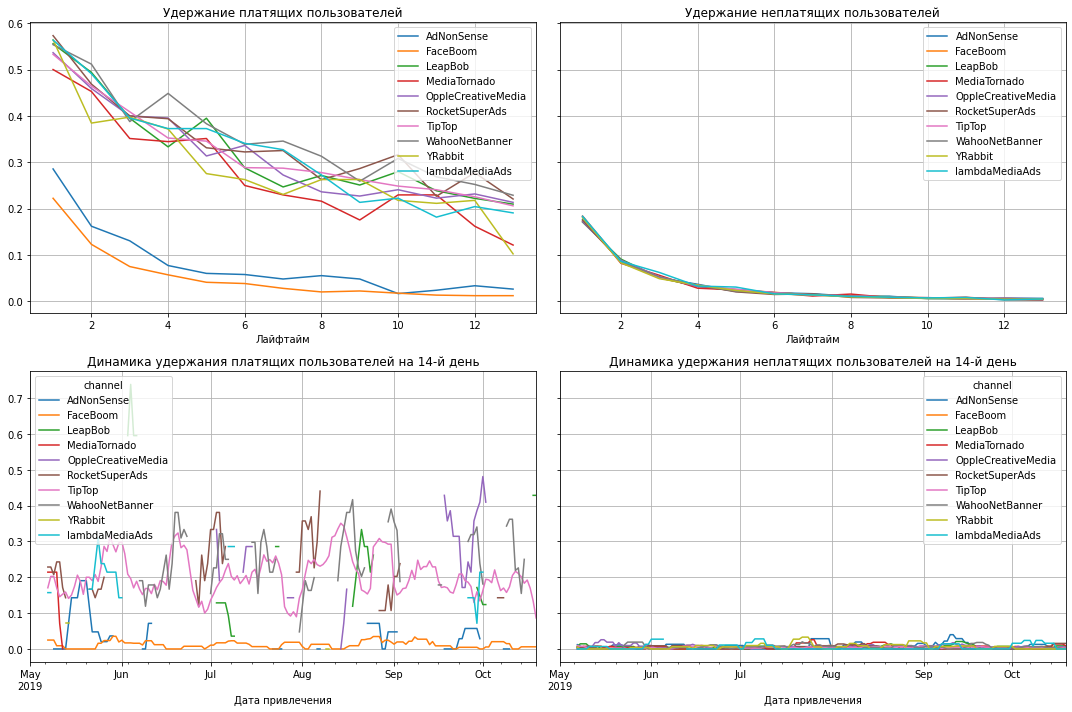

In [411]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Лучшие показатели конверсии пользователей показывают FaceBoom, AdNonSense, LambdaMediaAds. Но при этом у AdNonSense и  FaceBoom худшие показатели удержания пользователей. LambdaMediaAds удержание пользователей на уровне остальных площадок около 20% к 14-му дню.


Проведем анализ метрик для пользователей США

## Анализ маркетинговых расходов для рынка в США

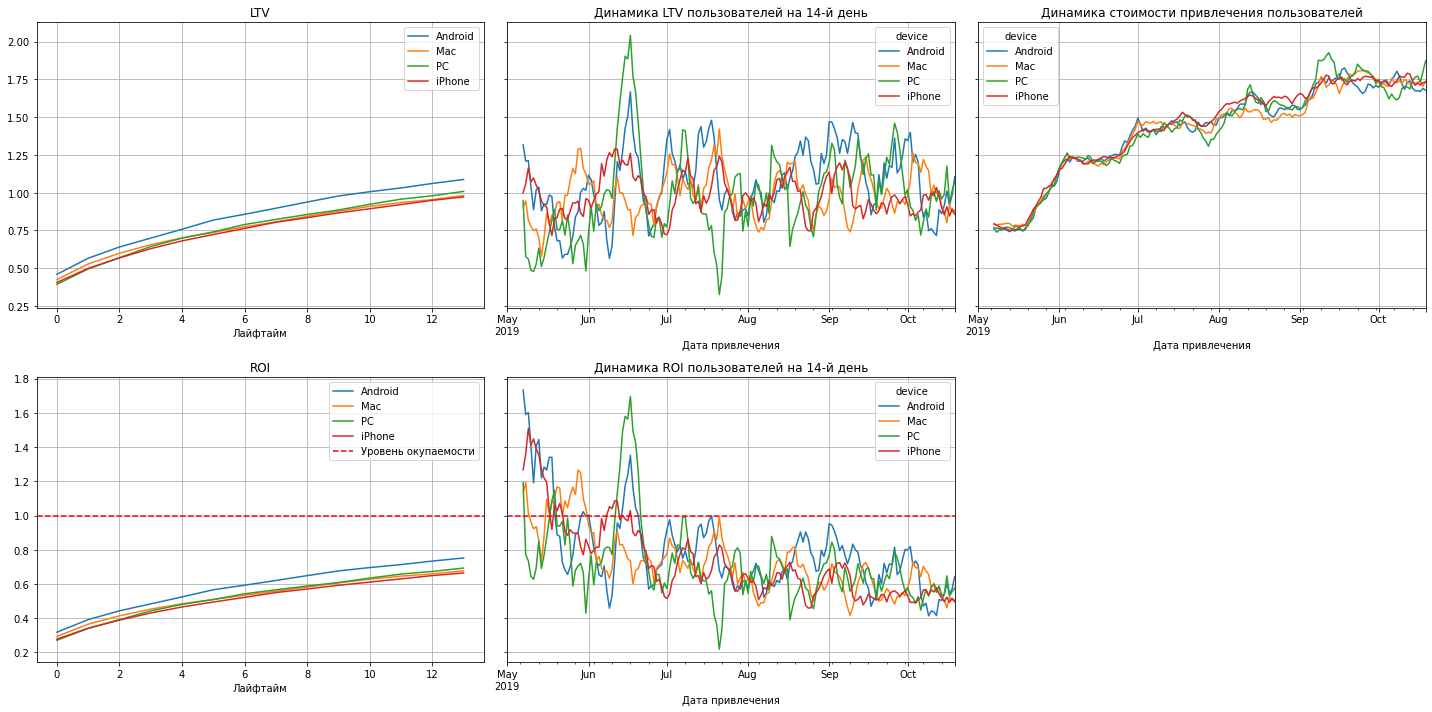

In [412]:
profiles_usa = profiles.query('region == "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Анализ окупаемости маркетинговых расходов для владельцев различных устройств не выявил проблем. LTV стабильно растет, стоимость привлечения пльзователей растет, маркетинговые затраты стабильно не окупаются на протяжении последних 4-х месяцев. Показатели для всех устройств примерно на одном уровне.

Посмотрим показатели по каналам привлечения пользователей.

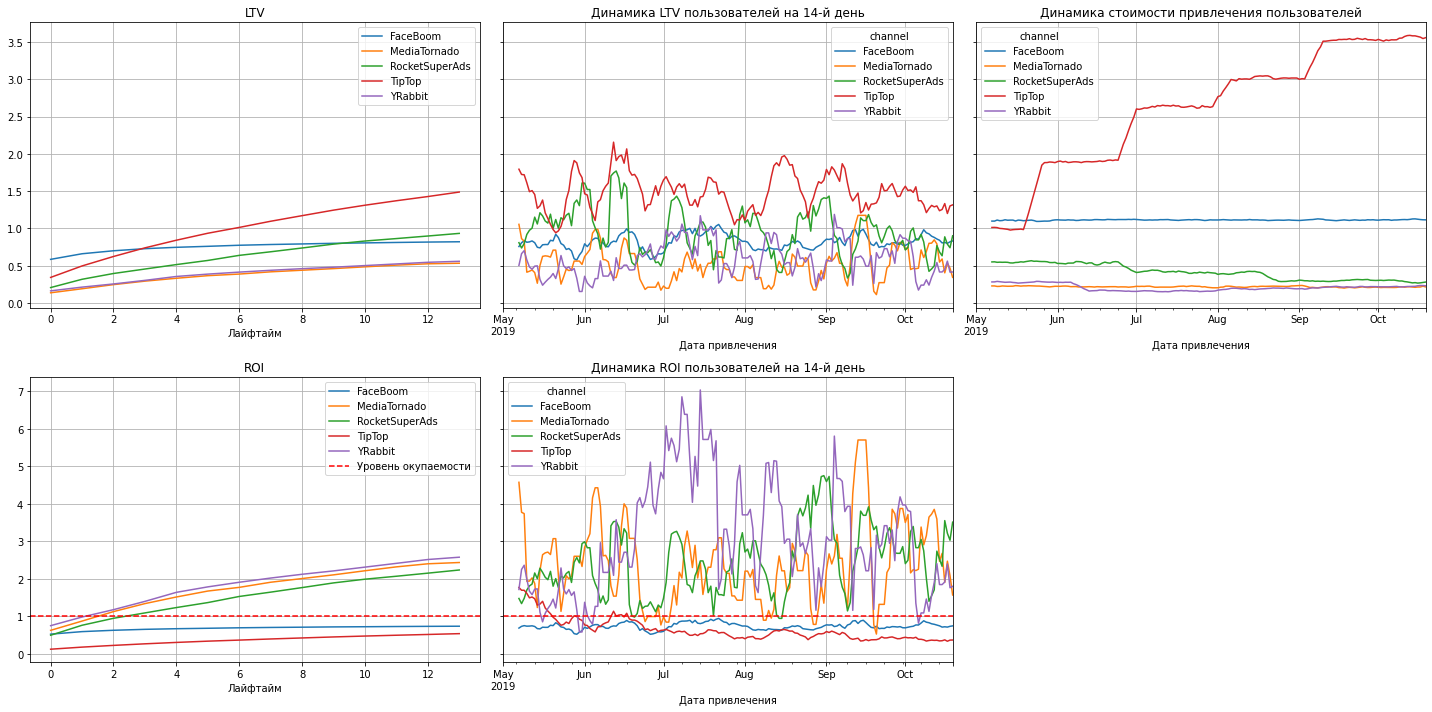

In [413]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

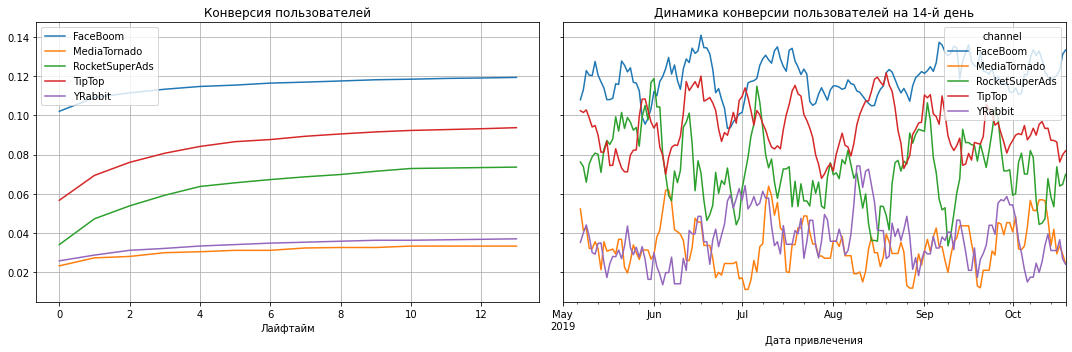

In [414]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

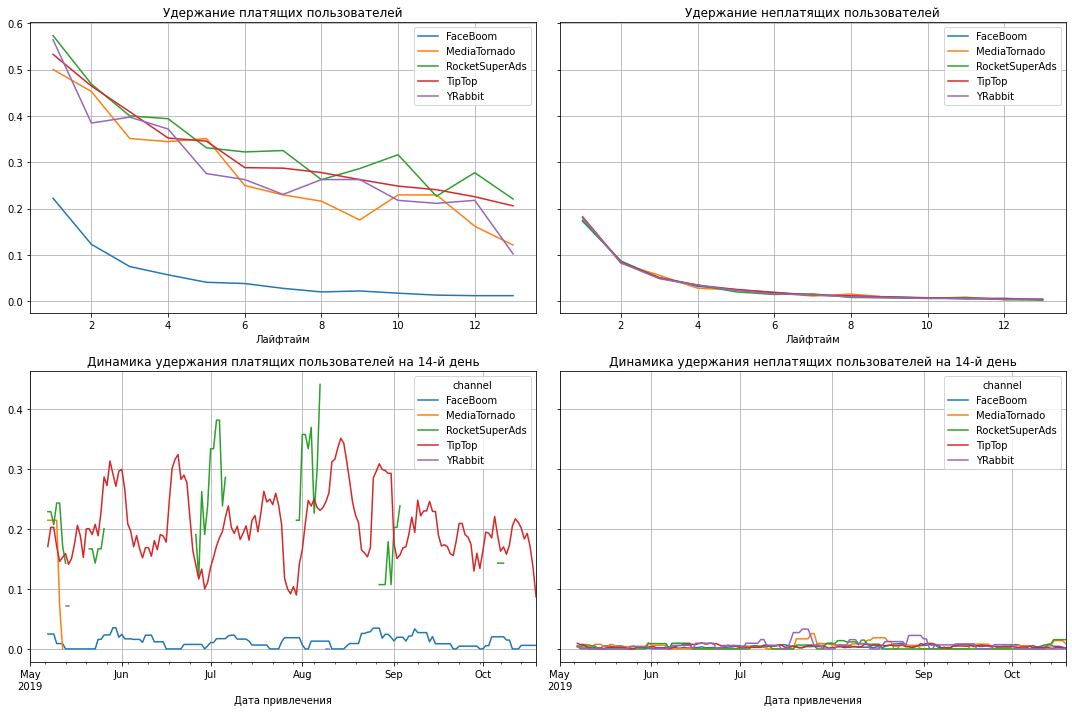

In [415]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Анализ показателей в разрезе каналов привлечения показал:
- LTV и динамика LTV самые высокие у канала TipTop
- стоимость привлечения пользователей за пол года значтельно выросла у канала TipTop, возможно маркетологи увеличили расходы, тк.канал приносит больше всего платных клиентов, но динамика LTV не изменилась за последние пол года, значит повышение расходов не оправдало себя.
- Показатель ROI ниже порога окупаемости все 6 месяцев.
- Конверсия пользователей у TipTop значительно ниже FaceBoom, динамика конверсии показывает анлогичные результаты 
- Удержание клиентов у FaceBoom значительно ниже других площадок

In [416]:
profiles_usa.groupby('channel').agg({'payer': 'mean',
                                    'user_id': 'nunique',
                                    'acquisition_cost': 'mean'}).sort_values(by='user_id', 
                                                                             ascending=False)

,payer,user_id,acquisition_cost
channel,,,
FaceBoom,0.122049,29144,1.113286
TipTop,0.096007,19561,2.799003
RocketSuperAds,0.079137,4448,0.412095
MediaTornado,0.035747,4364,0.218717
YRabbit,0.038265,4312,0.218975


In [417]:
visits['duration'] = visits['session_end'] - visits['session_start']
visits['month'] = visits['session_start'].dt.month
visits_usa = visits.query('region == "United States"').groupby('user_id').agg({'duration': 'sum',}).sort_values(by='duration').reset_index()
profiles_usa = profiles_usa.merge(visits_usa, on='user_id', how='left')
profiles_usa.query('duration < "0 days 00:01:00"').pivot_table(index='channel',
                                                             columns=['payer', 'device'],
                                                             values='user_id',
                                                             aggfunc='count').reset_index()


payer          channel   False                        True                  
device                 Android    Mac    PC iPhone Android   Mac   PC iPhone
0             FaceBoom    79.0  101.0  40.0  195.0     9.0  10.0  2.0   13.0
1         MediaTornado    11.0   17.0   2.0   23.0     NaN   NaN  NaN    NaN
2       RocketSuperAds    19.0   20.0   9.0   24.0     NaN   NaN  NaN    NaN
3               TipTop    57.0   86.0  35.0   99.0     NaN   NaN  NaN    NaN
4              YRabbit    28.0   16.0   6.0   35.0     NaN   NaN  NaN    NaN

Сравнение каналов привлечения показывает что самый большой приток клиентов дает 2канала FaceBoom и TipTop, а также доля платящих клиентов у этих каналов самая высокая. Но цена привлечения слишком завышена. При этом канал RocketSuperAds дает чуть меньше долю платящих клиентов, но приток только 4,5 тыс клиенов. Возможно есть смысл попробовать развивать этот канал. 
Также проведен анализ длительности сессий  среди пользователей США. Обнаружено что у некоторых пользователей за весь период суммарная длительность использования приложения менее минуты. Самое большое количество коротких сессий среди пользователей iPhone и Mac и пришедших с канала Причем короткие сессии есть даже среди клиентов оплативших услугу. Возможно пользователи канала FaceBoom сталкиваются с техническими проблемамию Это может объяснить сильный отток клиентов у этого канала.  

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Проведен анализ маркетинговых расходов для "Procrastinate Pro+". Для анализа были использованы отчет о посещениях пользоателей, отчет о расходах на маркетинг и отчет о покупках в приложении за 6 месяцев 2019 года.

На основе исходных данных были составлены профили пользователей. На основе профилей определили что пользователи приложения относятся к 4 странам: США, Германия, Великобртания, Франция. Самая большая доля пользователей приходится на США - 100 тыс, количество пользователей в остальных странах примрно одинаковые - 14-17 тыс. При этом среднее количество платящих клиентов в США не сильно отличается от остальных стран - 6% против 3-4%%.

Пользователи заходят в приложение с 4 типов устройств: iPhone, Android, Mac, PC. Самая большая доля пользователей приходится на влательцев iPhone, но при этом доли платящих клиентов примерно одинаковые для всех устойств - 5-6%.

Анализ рекламных каналов показал что самая большая доля клиентов приходят из канала TipTop и Faceboom.  При этом платящие клиенты у канла TipTop гораздо ниже. В лидерах канал FaceBoom, доля плтящих клиентов 12%. Более 50 тыс пользователей самостоятельно нашли приложение, но доля платящих клиентов только 2%.

Далее проведен анализ расходов на маркетинг по каналам привлечения и месяцам привлечения. Самая большая доля расходов относится к каналам TipTop и Faceboom. Динамика расходов по месяцам показывает что ежемесячно расходы увеличиваются и за 6 месяцев выросли в 2 раза.

На основе профилей пользователей оценили окупаемость рекламы вцелом. На графике ROI мы видим что затраты на маркетинг не окупаются. Динамика окупаемости инвестиций к 14 дню стабильно падает. При этом стоимость привлечения польователей стабильно растет.

Графики окупаемости рекламы в разрезе устройств показывают:
- LTV стабильно растет и не зависит от типа устройства. Только у РС показатель чуть ниже. При этом динамика LTV за 6 месяцев остается на одном уровне.
- динамика стоимости привлечения клиента стабильно растет, при этом самые высокие показатели у владельцев Mac и iPhone. Самая низкая стоимость привлечения у пользователей РС.
- ROI выше 100 % только у пользователей PC на 12 день "жизни" пользователя. При этом динамика  ROI за 6 месяцев снижается для всех устройств. А начная с сентября реклама перестала окупаться для всех устройств. 

Анализ по странам показал:
- расходы на маркетинг окупаются во всех странах на 4 день "жизни" клиента, кроме США. В США расходы не окупились даже на 14-й день.
- стоимость привлечения пользователя у США значительно выше остальных стран, в то время как в других странах стоимость снизилась и держится на уровне 0,4 в течение 5 месяцев
- Динамика ROI в США хуже остальных стран и ниже порога окупаемости.

Анализ окупемости рекламы по каналам привлечения показал:
- самый высокий LTV у каналов TipTop и lambdaediaAds. Причем показатель lambdaMediaAds выше чем у TipTop при средней стоимости привлечения пользователей.
- уже к 3 дню жизни почти по всем каналам расходы на маркетинг окупаются. Ниже порога окупаемости остаются каналы TipTop, FaceBoom, AdNonSense.
- стоимость привлечения пользователя значительно выше других у компании TipTop. Виден значительный рост стоимости привлечения за последние 6 месяцев.

Далее рассмотрели отдельно показатели для рынка США. Анализ окупаемости маркетинговых расходов для владельцев различных устройств не выявил проблем. LTV стабильно растет, стоимость привлечения пльзователей растет, маркетинговые затраты стабильно не окупаются на протяжении последних 4-х месяцев. Показатели для всех устройств примерно на одном уровне.
Анализ показателей в разрезе каналов привлечения показал:
- LTV и динамика LTV самые высокие у канала TipTop
- стоимость привлечения пользователей за пол года значтельно выросла у канала TipTop, возможно маркетологи увеличили расходы, тк.канал приносит больше всего платных клиентов, но динамика LTV не изменилась за последние пол года, значит повышение расходов не оправдало себя.
- Показатель ROI ниже порога окупаемости все 6 месяцев.
- Конверсия пользователей у TipTop значительно ниже FaceBoom, динамика конверсии показывает анлогичные результаты 
- Удержание клиентов у FaceBoom значительно ниже других площадок.

На основе анализа можно сделать вывод что необходимо пересмотреть маркетинговую стратегию в США. Из каналов привлечения исключить TipTop как слишком дорогой. Взамен попробовать развивать канал RocketSuperAds, т.к. он приносит довольно высокую долюплатящих клиентов. Также стоит проверить наличие техничесих проблем у пользователей iPhone и Mac пришедших через канал FaceBoom. От этого канала большой приток клиентов, но и слабое удержание. Анализ показал что у клиентов этого канала много коротких сессий менее 1 минуты, возможно есть технические проблемы и их решние поможет увеличить конверсию.  